In [ ]:
import pandas as pd

 # read the data from the CSV file

In [9]:
df = pd.read_csv("Book1.csv")

# Display the first and last 5 rows of the DataFrame

In [10]:
df.head()

,order_id,customer_id,order_date,product_id,product_name,product_price,quantity
0,25601,101,01-01-2023,602,Bookcases,5000,4
1,25602,102,02-02-2023,506,Stole,600,6
2,25603,103,03-03-2023,505,Hankerchief,400,2
3,25604,104,04-04-2023,514,Electronic Games,7999,5
4,25605,105,05-05-2023,501,Phones,5000,1


In [14]:
df.tail()

,order_id,customer_id,order_date,product_id,product_name,product_price,quantity
15,25616,116,2023-04-04,505,Hankerchief,400,13
16,25617,117,2023-05-05,504,Kurti,1200,6
17,25618,118,2023-06-06,503,T-shirt,2000,3
18,25619,119,2023-07-07,502,Saree,4000,11
19,25620,120,2023-08-08,502,Saree,4000,2


# Convert the 'order_date' column to datetime format

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month and year from the 'order_date' column

In [16]:
df['month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month

In [17]:
df['total_revenue'] = df['product_price'] * df['quantity']

# Group by month and calculate the sum of revenue for each group

In [18]:
monthly_total_revenue = df.groupby('month')['total_revenue'].sum()

# Displaying the result

In [19]:
monthly_total_revenue

month
2023-01    27700
2023-02     4200
2023-03     5600
2023-04    45195
2023-05    12200
2023-06    46000
2023-07    54000
2023-08    28000
2023-09    32000
2023-10     6300
2023-11    10500
2023-12     8000
Freq: M, Name: total_revenue, dtype: int64

In [82]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Plot a bar chart for monthly total revenue

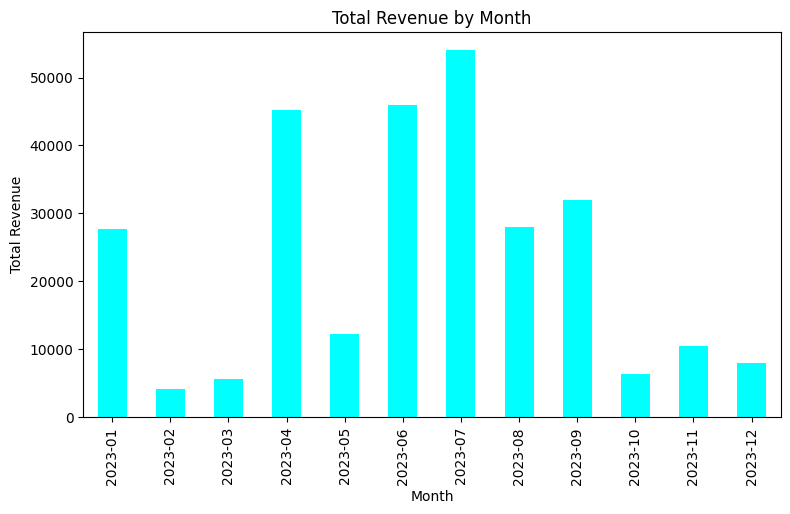

In [24]:
plt.figure(figsize=(9, 5))
monthly_total_revenue.plot(kind='bar', color='aqua')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# Plot a pie chart for the distribution of total revenue monthly wise

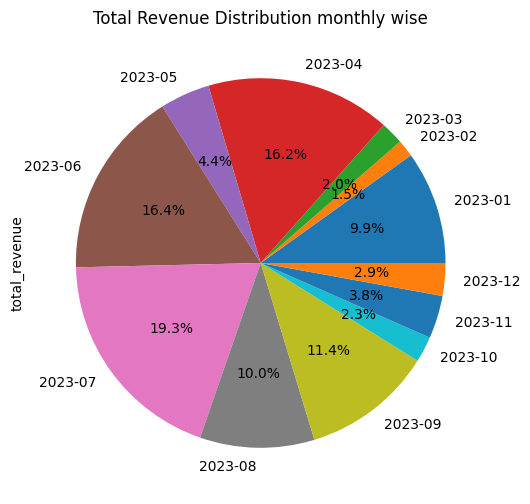

In [32]:
plt.figure(figsize=(6,6))
monthly_total_revenue.plot(kind='pie',autopct='%1.1f%%')
plt.title('Total Revenue Distribution monthly wise')
plt.show()

# Computing total revenue generated by each product

In [34]:
product_total_revenue = df.groupby('product_name')['total_revenue'].sum().reset_index()

# Displaying the total revenue for each product

In [35]:
product_total_revenue

,product_name,total_revenue
0,Bookcases,20000
1,Chairs,10500
2,Electronic Games,39995
3,Hankerchief,6000
4,Kurti,7200
5,Phones,55000
6,Saree,112000
7,Stole,9000
8,T-shirt,6000
9,Trousers,14000


# Plot a bar chart for total revenue generated by each product

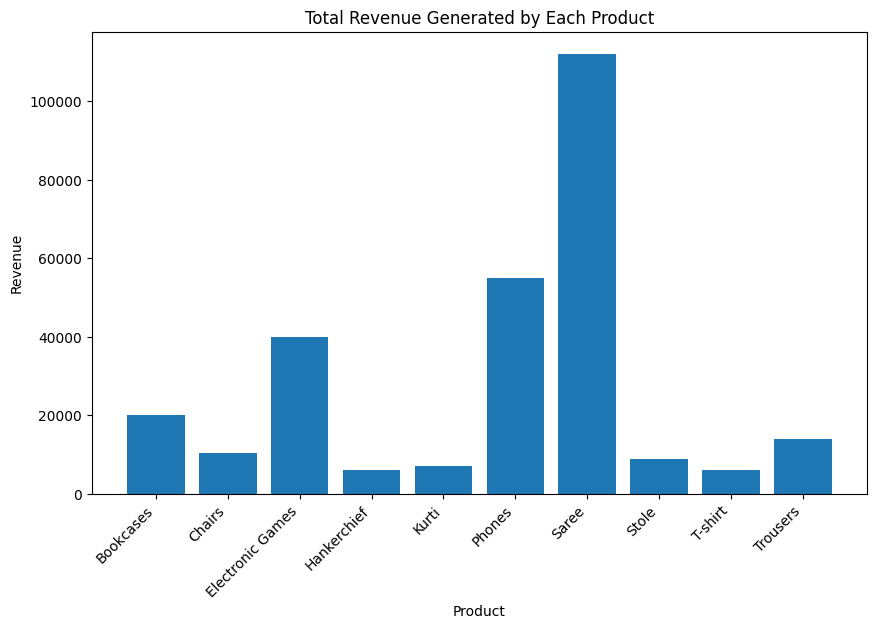

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(product_total_revenue['product_name'], product_total_revenue['total_revenue'])
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Total Revenue Generated by Each Product')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot a pie chart for the distribution of total revenue among products

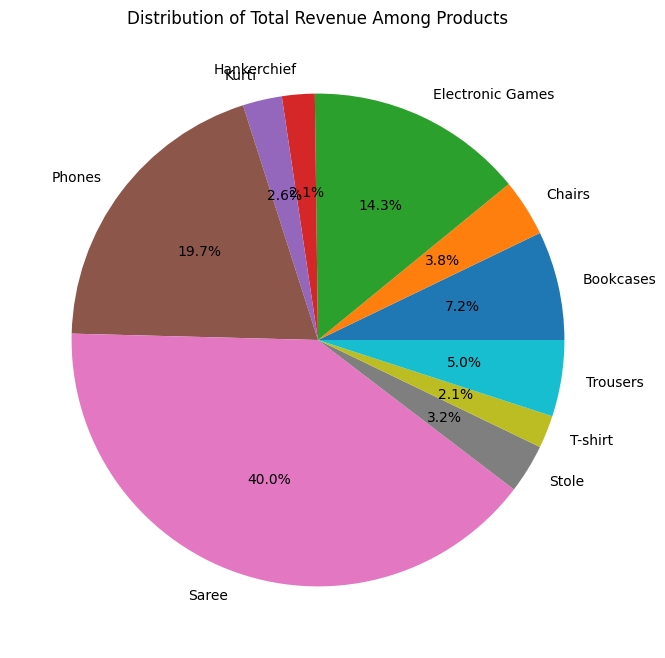

In [41]:
plt.figure(figsize=(8, 8))
plt.pie(product_total_revenue['total_revenue'], labels=product_revenue['product_name'], autopct='%1.1f%%')
plt.title('Distribution of Total Revenue Among Products')
plt.show()

# Computing total revenue per customer


In [46]:
total_revenue_per_customer = df.groupby('customer_id')['total_revenue'].sum().reset_index()

In [47]:
total_revenue_per_customer

,customer_id,total_revenue
0,101,20000
1,102,3600
2,103,800
3,104,39995
4,105,5000
5,106,40000
6,107,10000
7,108,20000
8,109,32000
9,110,6300


# Plot a bar chart for total revenue generated by each customer

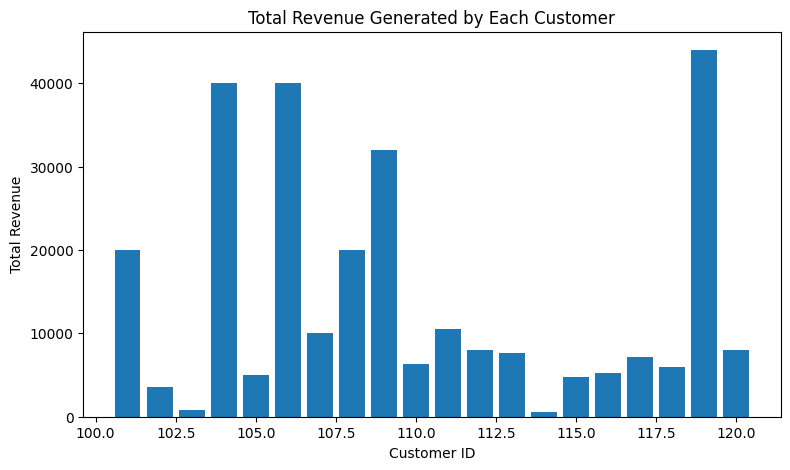

In [48]:
plt.figure(figsize=(9, 5))
plt.bar(total_revenue_per_customer['customer_id'], total_revenue_per_customer['total_revenue'])
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated by Each Customer')
plt.show()

# Plot a pie chart for the percentage of total revenue by each customer

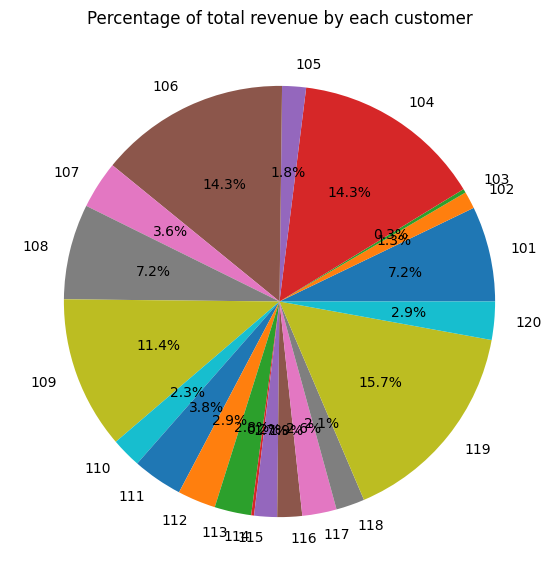

In [49]:
plt.figure(figsize=(7, 7))
plt.pie(total_revenue_per_customer['total_revenue'], labels=total_revenue_per_customer['customer_id'], autopct='%1.1f%%')
plt.title('Percentage of total revenue by each customer')
plt.show()

# Group the data by customer ID and calculate the total revenue for each customer

In [70]:
customer_revenue = df.groupby('customer_id')['total_revenue'].sum().reset_index()

# Display the total revenue for each customer

In [71]:
customer_revenue

,customer_id,total_revenue
0,101,20000
1,102,3600
2,103,800
3,104,39995
4,105,5000
5,106,40000
6,107,10000
7,108,20000
8,109,32000
9,110,6300


# Sort the customers by revenue in descending order

In [78]:
customer_revenue = df.groupby('customer_id')['total_revenue'].sum()

In [85]:
# Identify the top 10 customers with the highest total revenue
top_10_customers = customer_revenue.sort_values(ascending=False).head(10)

In [86]:
# Display the top 10 customers with the highest total revenue
top_10_customers

customer_id
119    44000
106    40000
104    39995
109    32000
101    20000
108    20000
111    10500
107    10000
112     8000
120     8000
Name: total_revenue, dtype: int64